In [1]:
# Load packages
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
from IPython import display
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

# Misc libraries
import random
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("C:/Users/Eren/OneDrive/Masaüstü/dataset_for_research"))

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.4
matplotlib version: 3.4.3
NumPy version: 1.20.3
SciPy version: 1.7.1
IPython version: 7.29.0
scikit-learn version: 1.2.2
-------------------------
['Bank.csv', 'co2_emissions.csv', 'Credit.csv', 'diabetes.csv', 'gender_submission.csv', 'laptops.csv', 'submit.csv', 'titanic_test.csv', 'titanic_train.csv']


In [2]:
os.chdir("C:/Users/Eren/OneDrive/Masaüstü/dataset_for_research")

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix 
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
data_raw=pd.read_csv("C:/Users/Eren/OneDrive/Masaüstü/dataset_for_research/diabetes.csv")
data_val=pd.read_csv("C:/Users/Eren/OneDrive/Masaüstü/dataset_for_research/diabetes.csv")
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html



from sklearn.model_selection import train_test_split

# Elimizdeki veri kümesini X ve y olarak ayıralım (X: özellikler, y: hedef değişken)
X = data_raw.drop(columns=["Outcome"])
y = data_raw["Outcome"]

# Veri kümesini eğitim ve test veri kümelerine bölelim (test_size parametresi test veri oranını belirler)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies     

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
244,2,146,76,35,194,38.2,0.329,29,0
15,7,100,0,0,0,30.0,0.484,32,1
509,8,120,78,0,0,25.0,0.409,64,0
253,0,86,68,32,0,35.8,0.238,25,0
585,1,93,56,11,0,22.5,0.417,22,0
683,4,125,80,0,0,32.3,0.536,27,1
691,13,158,114,0,0,42.3,0.257,44,1
426,0,94,0,0,0,0.0,0.256,25,0
519,6,129,90,7,326,19.6,0.582,60,0
387,8,105,100,36,0,43.3,0.239,45,1


In [5]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------
Test/Validation columns with null values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Örnek koşullara göre dönüşüm
data1['BMI_binary'] = data1['BMI'].apply(lambda x: 1 if x >= 31 else 0)
data1['ChildCount_binary'] = data1['Pregnancies'].apply(lambda x: 1 if x > 3.84 else 0)
data1['Insulin_binary'] = data1['Insulin'].apply(lambda x: 1 if x >= 80 else 0)
# Diğer değişkenler için benzer şekilde dönüşüm işlemleri yapılabilir


for dataset in data_cleaner:    
    # Eksik olan Glucose (Kan Şekeri) sütununu mod değeri ile doldur
    print("Önceki Glucose mode ve medyan",dataset['Glucose'].mode(),dataset['Glucose'].median())
    dataset["Glucose"].replace(0, dataset["Glucose"].mode()[0], inplace=True)
    print("Glucose mode ve medyan",dataset['Glucose'].mode(),dataset['Glucose'].median())

    # Eksik olan BloodPressure (Kan Basıncı) sütununu mod değeri ile doldur
    print("Önceki BP mode ve medyan",dataset['BloodPressure'].mode(),dataset['BloodPressure'].median())
    dataset['BloodPressure'].replace(0, dataset['BloodPressure'].mode()[0], inplace=True)
    print("BP mode ve medyan",dataset['BloodPressure'].mode(),dataset['BloodPressure'].median())

    
    # Eksik olan SkinThickness (Cilt Kalınlığı) sütununu mod değeri ile doldur
    print("Önceki SkinThickness mode ve medyan",dataset['SkinThickness'].mode(),dataset['SkinThickness'].median())
    dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mode()[0], inplace=True)
    print("SkinThickness mode ve medyan",dataset['SkinThickness'].mode(),dataset['SkinThickness'].median())


    # Eksik olan Insulin (İnsülin) sütununu medyan değeri ile doldur
    print("Önceki Insulin mode ve medyan",dataset['Insulin'].mode(),dataset['Insulin'].median())
    dataset['Insulin'].replace(0, dataset['Insulin'].median(), inplace=True)
    print("Insulin mode ve medyan",dataset['Insulin'].mode(),dataset['Insulin'].median())


    # Eksik olan Age (Yaş) sütununu medyan değeri ile doldur
    print("Önceki Age mode ve medyan",dataset['Age'].mode(),dataset['Age'].median())
    dataset['Age'].replace(0, dataset['Age'].median(), inplace=True)
    print("Age mode ve medyan",dataset['Age'].mode(),dataset['Age'].median())


print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())
#preview data again
data1.info()
data_val.info()
data1.sample(10)

Önceki Glucose mode ve medyan 0     99
1    100
Name: Glucose, dtype: int64 117.0
Glucose mode ve medyan 0    99
Name: Glucose, dtype: int64 117.0
Önceki BP mode ve medyan 0    70
Name: BloodPressure, dtype: int64 72.0
BP mode ve medyan 0    70
Name: BloodPressure, dtype: int64 72.0
Önceki SkinThickness mode ve medyan 0    0
Name: SkinThickness, dtype: int64 23.0
SkinThickness mode ve medyan 0    0
Name: SkinThickness, dtype: int64 23.0
Önceki Insulin mode ve medyan 0    0
Name: Insulin, dtype: int64 30.5
Insulin mode ve medyan 0    30.5
Name: Insulin, dtype: float64 31.25
Önceki Age mode ve medyan 0    22
Name: Age, dtype: int64 29.0
Age mode ve medyan 0    22
Name: Age, dtype: int64 29.0
Önceki Glucose mode ve medyan 0     99
1    100
Name: Glucose, dtype: int64 117.0
Glucose mode ve medyan 0    99
Name: Glucose, dtype: int64 117.0
Önceki BP mode ve medyan 0    70
Name: BloodPressure, dtype: int64 72.0
BP mode ve medyan 0    70
Name: BloodPressure, dtype: int64 72.0
Önceki SkinThickn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_binary,ChildCount_binary,Insulin_binary
463,5,88,78,30,30.5,27.6,0.258,37,0,0,1,0
119,4,99,76,15,51.0,23.2,0.223,21,0,0,1,0
627,0,132,78,0,30.5,32.4,0.393,21,0,1,0,0
764,2,122,70,27,30.5,36.8,0.340,27,0,1,0,0
524,3,125,58,0,30.5,31.6,0.151,24,0,1,0,0
375,12,140,82,43,325.0,39.2,0.528,58,1,1,1,1
334,1,95,60,18,58.0,23.9,0.260,22,0,0,0,0
523,9,130,70,0,30.5,34.2,0.652,45,1,1,1,0
216,5,109,62,41,129.0,35.8,0.514,25,1,1,1,1
330,8,118,72,19,30.5,23.1,1.476,46,0,0,1,0


hamilelik- diabet ilişkisi classification algorithm ile
kan şekeri- insulin ve diabet ilişkisi
kan şekeri diabet
insulin diabet
glükoz insulin diabet ilişkisi
skinThickness BMI ve diabet ilişkisi


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Hamilelik - Diyabet İlişkisi (Logistic Regression):-------------------------------------------------

# Verileri bağımlı ve bağımsız değişkenlere ayırma
X = data1[['Pregnancies']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_of_preg_dia = model.score(X_test, y_test)
print("Accuracy of pregnancies on diabetes :", accuracy_of_preg_dia)

# Kan basıncı - Insulin ve Diyabet İlişkisi (Logistic Regression):----------------------------------
X = data1[['BloodPressure', 'Insulin']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_bp_ins= model.score(X_test, y_test)
print("Accuracy of blood pressure and insulin on diabetes:", accuracy_bp_ins)

Accuracy of pregnancies on diabetes : 0.6948051948051948
Accuracy of blood pressure and insulin on diabetes: 0.6493506493506493


In [8]:

# Kan basıncı ve Diyabet İlişkisi (Logistic Regression):-------------------------------------------

X = data1[['BloodPressure']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_bp_dia = model.score(X_test, y_test)
print("Accuracy of glucose on diabetes:", accuracy_bp_dia)
#Insulin ve Diyabet İlişkisi (Logistic Regression):------------------------------------------------

X = data1[['Insulin']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_ins_dia = model.score(X_test, y_test)
print("Accuracy of insulin on diabetes:", accuracy_ins_dia)
# Glükoz - Insulin ve Diyabet İlişkisi (Logistic Regression):---------------------------------------

X = data1[['Glucose', 'Insulin']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_glu_ins = model.score(X_test, y_test)
print("Accuracy of glucose and insulin on diabetes:", accuracy_glu_ins)


Accuracy of glucose on diabetes: 0.6493506493506493
Accuracy of insulin on diabetes: 0.6493506493506493
Accuracy of glucose and insulin on diabetes: 0.7337662337662337


In [9]:
# SkinThickness - BMI ve Diyabet İlişkisi (Logistic Regression):-------------------------------------


X = data1[['SkinThickness', 'BMI']]
y = data1['Outcome']

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verileriyle modeli değerlendirme
accuracy_skin_bmi = model.score(X_test, y_test)
print("Accuracy of skin thickness and BMI on diabetes:", accuracy_skin_bmi)
#Bu kodlar, Logistic Regression sınıflandırma algoritmasını kullanarak belirli bağımsız 
#değişkenlerle diyabeti tahmin etmek için kullanılır. Elbette, daha gelişmiş modeller ve model ayarlamaları 
#yaparak performansı artırabilirsiniz. Ayrıca, diğer sınıflandırma algoritmalarını da deneyerek sonuçları 
#karşılaştırabilirsiniz.

Accuracy of skin thickness and BMI on diabetes: 0.6623376623376623


In [10]:
X1 = data1[['BMI','Insulin']]
y1 = data1['Outcome']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X1_train, y1_train)


from sklearn.metrics import confusion_matrix
# Sadece "BMI" ve "Insulin" bağımsız değişkenleri üzerinden verileri filtrele
X1_filtered_BMI_and_Insulin = X1_test[['BMI','Insulin']]

# Modeli sadece bu verilerle eğit
model.fit(X1_filtered_BMI_and_Insulin, y1_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_BMI_and_Insulin = confusion_matrix(y1_test, model.predict(X1_filtered_BMI_and_Insulin))
print("Confusion Matrix for BMI and Insulin on diabetes:")
print(cm_filtered_BMI_and_Insulin)

# Hamilelik - Diyabet İlişkisi (Logistic Regression):
cm_preg_dia = confusion_matrix(y1_test, model.predict(X1_test))
print("Confusion Matrix for pregnancies on diabetes:")
print(cm_preg_dia)
#---------------------------------------------------------------------------------------

X2 = data1[['Pregnancies']]
y2 = data1['Outcome']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Sadece Pregnancies bağımsız değişkenleri üzerinden verileri filtrele
X2_filtered_pregnancies = X2_test[['Pregnancies']]

# Modeli sadece bu verilerle eğit
model.fit(X2_filtered_pregnancies, y2_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_preg = confusion_matrix(y2_test, model.predict(X2_filtered_pregnancies))
print("Confusion Matrix for Pregnancies on diabetes:")
print(cm_filtered_preg)



#----------------------------------------------------------------------------------------
X3 = data1[['BloodPressure','Insulin']]
y3 = data1['Outcome']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X3_train, y3_train)

# Sadece "BloodPressure" ve "Insulin" bağımsız değişkenleri üzerinden verileri filtrele
X3_filtered_bp_ins = X3_test[['BloodPressure','Insulin']]

# Modeli sadece bu verilerle eğit
model.fit(X3_filtered_bp_ins, y3_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_bp_ins = confusion_matrix(y3_test, model.predict(X3_filtered_bp_ins))
print("Confusion Matrix for BloodPressure and Insulin on diabetes:")
print(cm_filtered_bp_ins)
#----------------------------------------------------------------------------------------
X4 = data1[['BloodPressure']]
y4 = data1['Outcome']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X4_train, y4_train)

# Sadece "BloodPressure" bağımsız değişkenleri üzerinden verileri filtrele
X4_filtered_bp = X4_test[['BloodPressure']]

# Modeli sadece bu verilerle eğit
model.fit(X4_filtered_bp, y4_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_bp = confusion_matrix(y4_test, model.predict(X4_filtered_bp))
print("Confusion Matrix for BloodPressure on diabetes:")
print(cm_filtered_bp)
#----------------------------------------------------------------------------------------
X5 = data1[['Insulin']]
y5 = data1['Outcome']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X5_train, y5_train)

# Sadece "Insulin" bağımsız değişkenleri üzerinden verileri filtrele
X5_filtered_ins = X5_test[['Insulin']]

# Modeli sadece bu verilerle eğit
model.fit(X5_filtered_ins, y5_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_ins = confusion_matrix(y5_test, model.predict(X5_filtered_ins))
print("Confusion Matrix for Insulin on diabetes:")
print(cm_filtered_ins)
#----------------------------------------------------------------------------------------
X6 = data1[['Glucose','Insulin']]
y6 = data1['Outcome']
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X6_train, y6_train)

# Sadece "Insulin" bağımsız değişkenleri üzerinden verileri filtrele
X6_filtered_ins_glucose = X6_test[['Insulin','Glucose']]

# Modeli sadece bu verilerle eğit
model.fit(X6_filtered_ins_glucose, y6_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_ins_glu = confusion_matrix(y6_test, model.predict(X6_filtered_ins_glucose))
print("Confusion Matrix for Insulin and Glucose on diabetes:")
print(cm_filtered_ins_glu)
#----------------------------------------------------------------------------------------
X7 = data1[['SkinThickness', 'BMI']]
y7 = data1['Outcome']
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X7_train, y7_train)

# Sadece "SkinThickness"  ve "BMI" bağımsız değişkenleri üzerinden verileri filtrele
X7_filtered_skn_bmi = X7_test[['SkinThickness','BMI']]

# Modeli sadece bu verilerle eğit
model.fit(X7_filtered_skn_bmi, y7_test)

# Tahminleri yap ve confusion matrix oluştur
cm_filtered_skn_bmi = confusion_matrix(y7_test, model.predict(X7_filtered_skn_bmi))
print("Confusion Matrix for SkinThickness and BMI on diabetes:")
print(cm_filtered_skn_bmi)
#----------------------------------------------------------------------------------------

# SkinThickness - BMI ve Diyabet İlişkisi (Logistic Regression):
cm_skin_bmi = confusion_matrix(y_test, model.predict(X_test))
print("Confusion Matrix Score On diabetes:")
print(cm_skin_bmi)


Confusion Matrix for BMI and Insulin on diabetes:
[[91  8]
 [38 17]]
Confusion Matrix for pregnancies on diabetes:
[[91  8]
 [38 17]]
Confusion Matrix for Pregnancies on diabetes:
[[92  7]
 [40 15]]
Confusion Matrix for BloodPressure and Insulin on diabetes:
[[90  9]
 [38 17]]
Confusion Matrix for BloodPressure on diabetes:
[[92  7]
 [52  3]]
Confusion Matrix for Insulin on diabetes:
[[95  4]
 [44 11]]
Confusion Matrix for Insulin and Glucose on diabetes:
[[83 16]
 [23 32]]
Confusion Matrix for SkinThickness and BMI on diabetes:
[[91  8]
 [45 10]]
Confusion Matrix Score On diabetes:
[[91  8]
 [45 10]]


yukarıda hep makine öğrenmesi yaptık. Aşağıya biraz veri analizi koy. Coefficient ve korelasyon

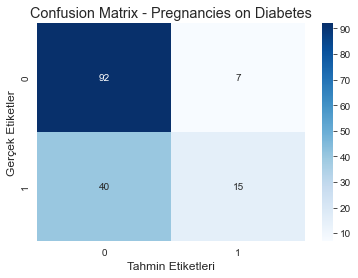

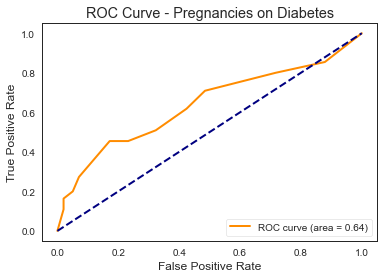

Classification Report - Pregnancies on Diabetes:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        99
           1       0.68      0.27      0.39        55

    accuracy                           0.69       154
   macro avg       0.69      0.60      0.59       154
weighted avg       0.69      0.69      0.65       154



'\n0 = Diyabet (-)\n1= Diyabet değil (+) \nAsagidaki confusion matrixte  sol üst köşe kisilerde diyabet var ve model de diyabet var demiş, doğru tahmin etmiş\nBu örnekle mi.\n\n'

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Hamilelik - Diyabet İlişkisi (Logistic Regression):
X_preg = data1[['Pregnancies']]
y_preg = data1['Outcome']
X_train_preg, X_test_preg, y_train_preg, y_test_preg = train_test_split(X_preg, y_preg, test_size=0.2, random_state=42)
model_preg = LogisticRegression()
model_preg.fit(X_train_preg, y_train_preg)
y_pred_preg = model_preg.predict(X_test_preg)

# Confusion matrix oluşturma
cm_preg = confusion_matrix(y_test_preg, y_pred_preg)

# Heatmap ile confusion matrix görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm_preg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.title('Confusion Matrix - Pregnancies on Diabetes')
plt.show()

# ROC eğrisini oluşturma
y_pred_prob_preg = model_preg.predict_proba(X_test_preg)[:, 1]
fpr_preg, tpr_preg, _ = roc_curve(y_test_preg, y_pred_prob_preg)
roc_auc_preg = auc(fpr_preg, tpr_preg)

# ROC eğrisini görselleştirme
plt.figure(figsize=(6, 4))
plt.plot(fpr_preg, tpr_preg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_preg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Pregnancies on Diabetes')
plt.legend(loc="lower right")
plt.show()

# Sınıflandırma raporu oluşturma
classification_rep_preg = classification_report(y_test_preg, y_pred_preg)
print("Classification Report - Pregnancies on Diabetes:")
print(classification_rep_preg)

# Diğer bağımsız değişkenler için de aynı şekilde yapılır...
'''
0 = Diyabet (-)
1= Diyabet değil (+) 
Asagidaki confusion matrixte  sol üst köşe kisilerde diyabet var ve model de diyabet var demiş, doğru tahmin etmiş
Bu örnekle mi.

'''

In [12]:
#define y variable aka target/outcome
Target = ['Outcome']

#define x variables for original features aka feature selection
data1_x = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] #pretty name/values for charts
data1_x_calc = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

Original X Y:  ['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 



In [13]:
print(data1['Outcome'].dtypes)

int64


In [14]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    my_rho = np.corrcoef(dataset["Age"], dataset["DiabetesPedigreeFunction"])[0, 1]
    pregn_dia = np.corrcoef(dataset["Pregnancies"],dataset["Outcome"])
    my_rho
   # dataset['age/diabetes'] = dataset [''] + dataset['Parch'] + 1
    #dataset['Age/Dia_correlation'] = dataset['Age'].corr(dataset[])


    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['ins_glu_coefficient'] = np.corrcoef(dataset['Glucose'], dataset["Insulin"])[0,1]

    #yaşla ailedeki diyabet çıkma oranı iliş kisi v
    #soy ağacı ile  diyabet ilişkisi x
    #BMI ve diyabet ilişkisi
    #insulin glikoz ilişkisi
    #hamilelik- insulin glikoz ilişkisi

    
#cleanup rare title names
print(data1['Outcome'].value_counts())

stat_min = 10 

#while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
#title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
'''
#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)
'''

#preview data again
data1.info()
data_val.info()
data1.sample(10)

0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_binary                768 non-null    int64  
 10  ChildCount_binary         768 non-null    int64  
 11  Insulin_binary            768 non-null    int64  
 12  ins_glu_coefficient       768 non-null    float64
dtypes: float64(4), int6

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_binary,ChildCount_binary,Insulin_binary,ins_glu_coefficient
466,0,74,52,10,36.0,27.8,0.269,22,0,0,0,0,0.359352
587,6,103,66,0,30.5,24.3,0.249,29,0,0,1,0,0.359352
10,4,110,92,0,30.5,37.6,0.191,30,0,1,1,0,0.359352
398,3,82,70,0,30.5,21.1,0.389,25,0,0,0,0,0.359352
657,1,120,80,48,200.0,38.9,1.162,41,0,1,0,1,0.359352
93,4,134,72,0,30.5,23.8,0.277,60,1,0,1,0,0.359352
225,1,87,78,27,32.0,34.6,0.101,22,0,1,0,0,0.359352
359,1,196,76,36,249.0,36.5,0.875,29,1,1,0,1,0.359352
445,0,180,78,63,14.0,59.4,2.420,25,1,1,0,0,0.359352
645,2,157,74,35,440.0,39.4,0.134,30,0,1,0,1,0.359352


In [15]:
my_rho = np.corrcoef(dataset["Age"], dataset["DiabetesPedigreeFunction"])
print(my_rho)


[[1.         0.03356131]
 [0.03356131 1.        ]]


0.03356131243480545
Korelasyon: 0.03356131243480545


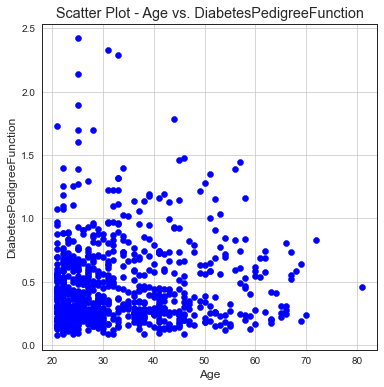

In [16]:
correlation = data1['Age'].corr(data1['DiabetesPedigreeFunction'])
print(correlation)
import pandas as pd
import matplotlib.pyplot as plt


# Korelasyon hesaplayalım
correlation = data1['Age'].corr(data1['DiabetesPedigreeFunction'])
print("Korelasyon:", correlation)

# Scatter plot ile korelasyonu görselleştirelim
plt.figure(figsize=(6, 6))
plt.scatter(data1['Age'], data1['DiabetesPedigreeFunction'], color='blue')
plt.title('Scatter Plot - Age vs. DiabetesPedigreeFunction')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.grid(True)
plt.show()


In [17]:
dataset['ins_glu'] = np.corrcoef(dataset['Glucose'], dataset["Insulin"])[0,1]
print(dataset['ins_glu'])

0      0.359352
1      0.359352
2      0.359352
3      0.359352
4      0.359352
         ...   
763    0.359352
764    0.359352
765    0.359352
766    0.359352
767    0.359352
Name: ins_glu, Length: 768, dtype: float64


In [18]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BMI_binary                  0
ChildCount_binary           0
Insulin_binary              0
ins_glu_coefficient         0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   Di

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
data1_x = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for x in data1_x:
    if data1[x].dtype != ('float64') :
        print('Diabetes Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Outcome'],data1[Target[0]]))

Diabetes Correlation by: Pregnancies
    Pregnancies   Outcome
0             0  0.342342
1             1  0.214815
2             2  0.184466
3             3  0.360000
4             4  0.338235
5             5  0.368421
6             6  0.320000
7             7  0.555556
8             8  0.578947
9             9  0.642857
10           10  0.416667
11           11  0.636364
12           12  0.444444
13           13  0.500000
14           14  1.000000
15           15  1.000000
16           17  1.000000
---------- 

Diabetes Correlation by: Glucose
     Glucose  Outcome
0         44     0.00
1         56     0.00
2         57     0.00
3         61     0.00
4         62     0.00
..       ...      ...
130      195     1.00
131      196     1.00
132      197     0.75
133      198     1.00
134      199     1.00

[135 rows x 2 columns]
---------- 

Diabetes Correlation by: BloodPressure
    BloodPressure   Outcome
0              24  0.000000
1              30  0.500000
2              38  0.0000

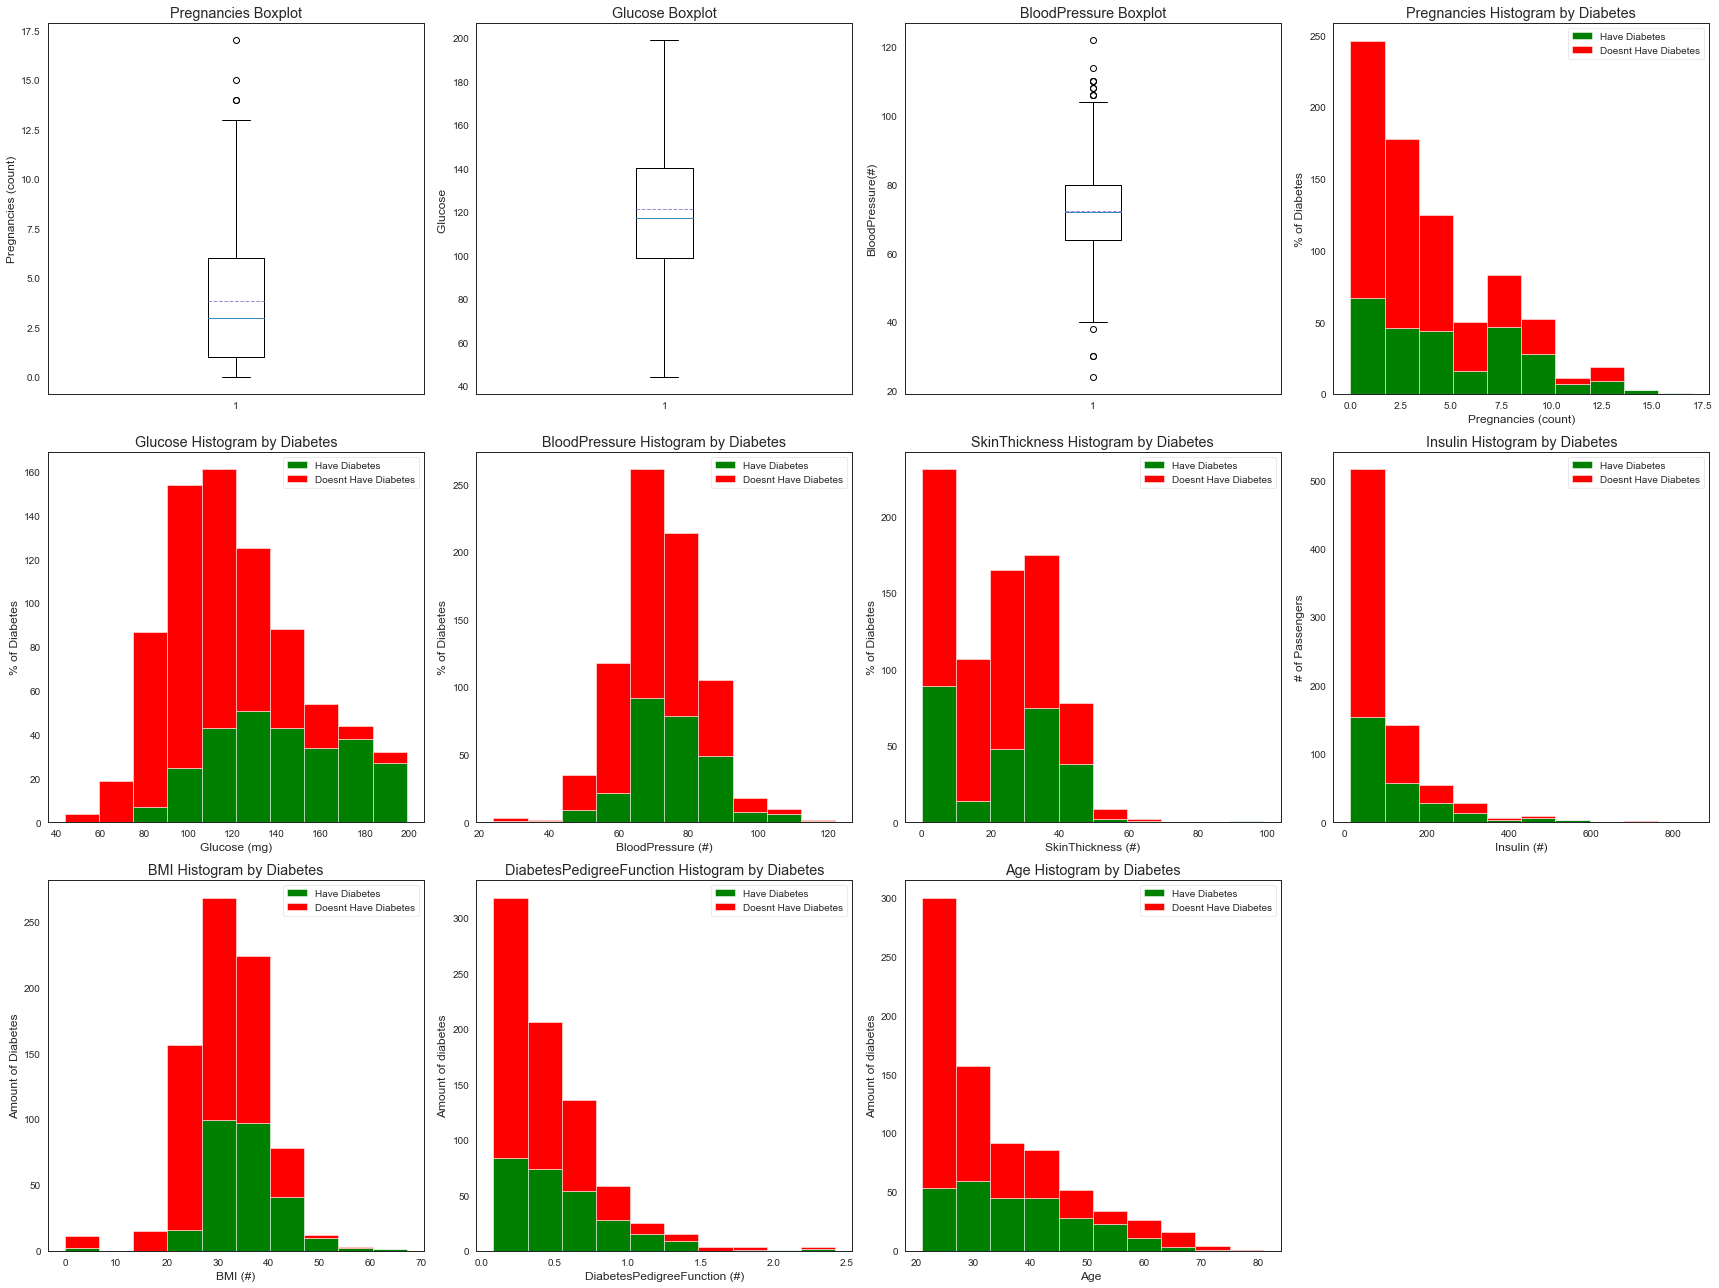

In [20]:
import matplotlib.pyplot as plt

# Assuming data1 contains your data
plt.figure(figsize=[24, 18])

plt.subplot(3, 4, 1)
plt.boxplot(x=data1['Pregnancies'], showmeans=True, meanline=True)
plt.title('Pregnancies Boxplot')
plt.ylabel('Pregnancies (count)')

plt.subplot(3, 4, 2)
plt.boxplot(data1['Glucose'], showmeans=True, meanline=True)
plt.title('Glucose Boxplot')
plt.ylabel('Glucose ')

plt.subplot(3, 4, 3)
plt.boxplot(data1['BloodPressure'], showmeans=True, meanline=True)
plt.title('BloodPressure Boxplot')
plt.ylabel('BloodPressure(#)')

plt.subplot(3, 4, 4)
plt.hist(x=[data1[data1['Outcome'] == 1]['Pregnancies'], data1[data1['Outcome'] == 0]['Pregnancies']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('Pregnancies Histogram by Diabetes')
plt.xlabel('Pregnancies (count)')
plt.ylabel('% of Diabetes')
plt.legend()

plt.subplot(3, 4, 5)
plt.hist(x=[data1[data1['Outcome'] == 1]['Glucose'], data1[data1['Outcome'] == 0]['Glucose']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('Glucose Histogram by Diabetes')
plt.xlabel('Glucose (mg)')
plt.ylabel('% of Diabetes')
plt.legend()

plt.subplot(3, 4, 6)
plt.hist(x=[data1[data1['Outcome'] == 1]['BloodPressure'], data1[data1['Outcome'] == 0]['BloodPressure']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('BloodPressure Histogram by Diabetes')
plt.xlabel('BloodPressure (#)')
plt.ylabel('% of Diabetes')
plt.legend()

plt.subplot(3, 4, 7)
plt.hist(x=[data1[data1['Outcome'] == 1]['SkinThickness'], data1[data1['Outcome'] == 0]['SkinThickness']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('SkinThickness Histogram by Diabetes')
plt.xlabel('SkinThickness (#)')
plt.ylabel('% of Diabetes')
plt.legend()

plt.subplot(3, 4, 8)
plt.hist(x=[data1[data1['Outcome'] == 1]['Insulin'], data1[data1['Outcome'] == 0]['Insulin']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('Insulin Histogram by Diabetes')
plt.xlabel('Insulin (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(3, 4, 9)
plt.hist(x=[data1[data1['Outcome'] == 1]['BMI'], data1[data1['Outcome'] == 0]['BMI']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('BMI Histogram by Diabetes')
plt.xlabel('BMI (#)')
plt.ylabel('Amount of Diabetes')
plt.legend()

plt.subplot(3, 4, 10)
plt.hist(x=[data1[data1['Outcome'] == 1]['DiabetesPedigreeFunction'], data1[data1['Outcome'] == 0]['DiabetesPedigreeFunction']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('DiabetesPedigreeFunction Histogram by Diabetes')
plt.xlabel('DiabetesPedigreeFunction (#)')
plt.ylabel('Amount of diabetes')
plt.legend()

plt.subplot(3, 4, 11)
plt.hist(x=[data1[data1['Outcome'] == 1]['Age'], data1[data1['Outcome'] == 0]['Age']],
         stacked=True, color=['g', 'r'], label=['Have Diabetes', 'Doesnt Have Diabetes'])
plt.title('Age Histogram by Diabetes')
plt.xlabel('Age ')
plt.ylabel('Amount of diabetes')
plt.legend()

plt.tight_layout()
plt.show()


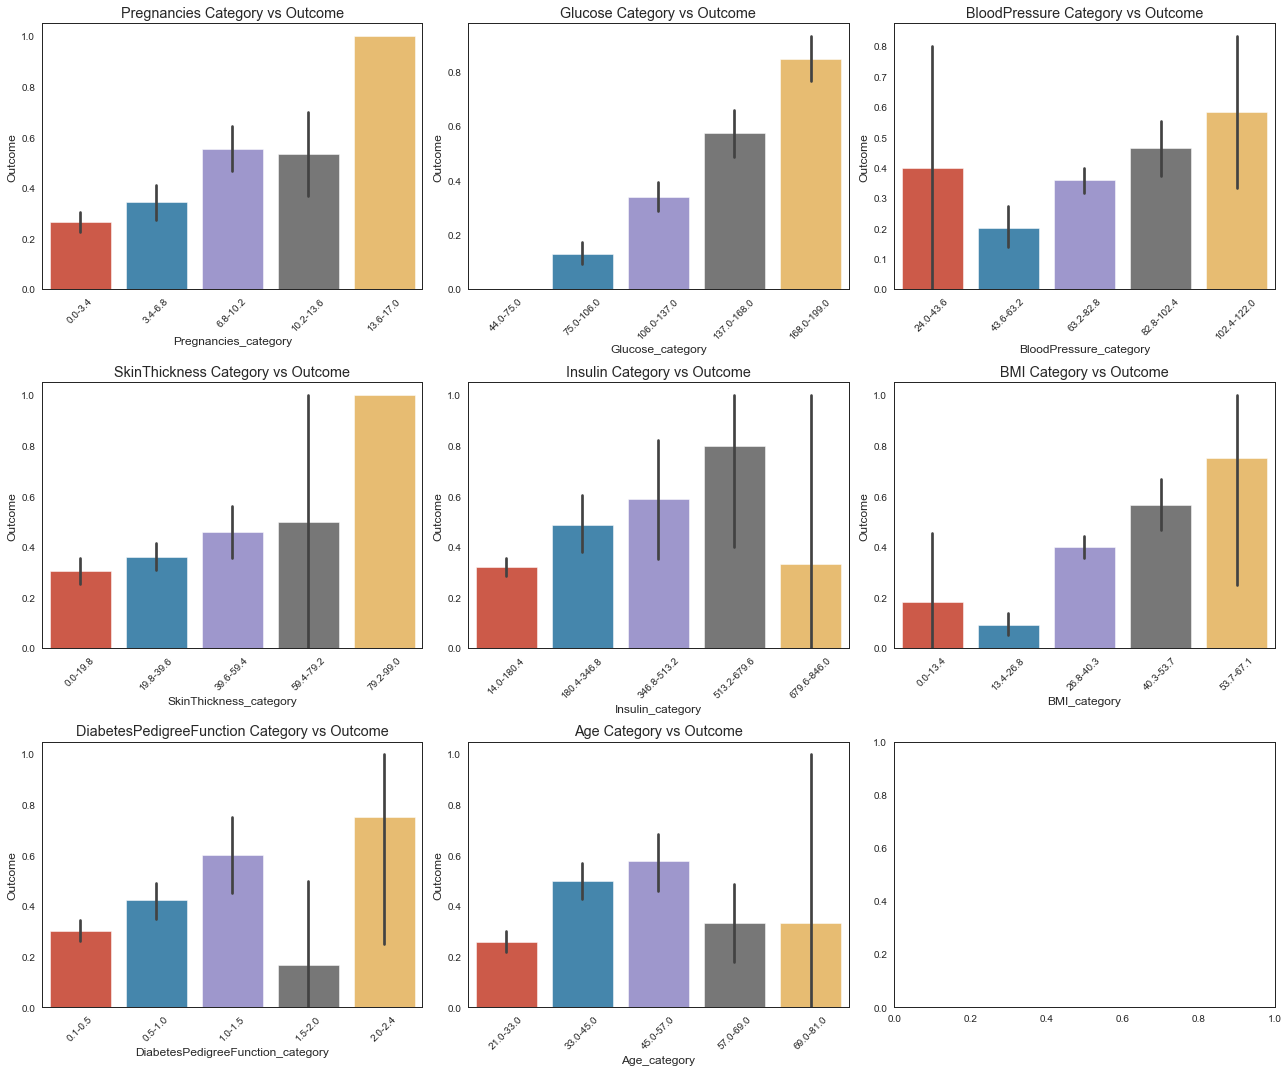

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of categories for each variable
num_categories = 5

# Function to categorize continuous variables into discrete categories
def categorize_continuous_column(data, column, num_categories):
    min_value = data[column].min()
    max_value = data[column].max()
    step_size = (max_value - min_value) / num_categories
    bins = [min_value + i * step_size for i in range(num_categories + 1)]
    labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(num_categories)]
    data[column + '_category'] = pd.cut(data[column], bins=bins, labels=labels, include_lowest=True)

# Copy the data to avoid modifying the original DataFrame
subsample_data1_categorized = data1.copy()

# Categorize selected continuous columns
continuous_columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in continuous_columns:
    categorize_continuous_column(subsample_data1_categorized, column, num_categories)

# Set up the figure and subplots
num_plots = len(continuous_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))

# Create subplots for categorized continuous variables
for i, column in enumerate(continuous_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.barplot(x=column + '_category', y='Outcome', data=subsample_data1_categorized, ax=ax)
    ax.set_title(f'{column} Category vs Outcome')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


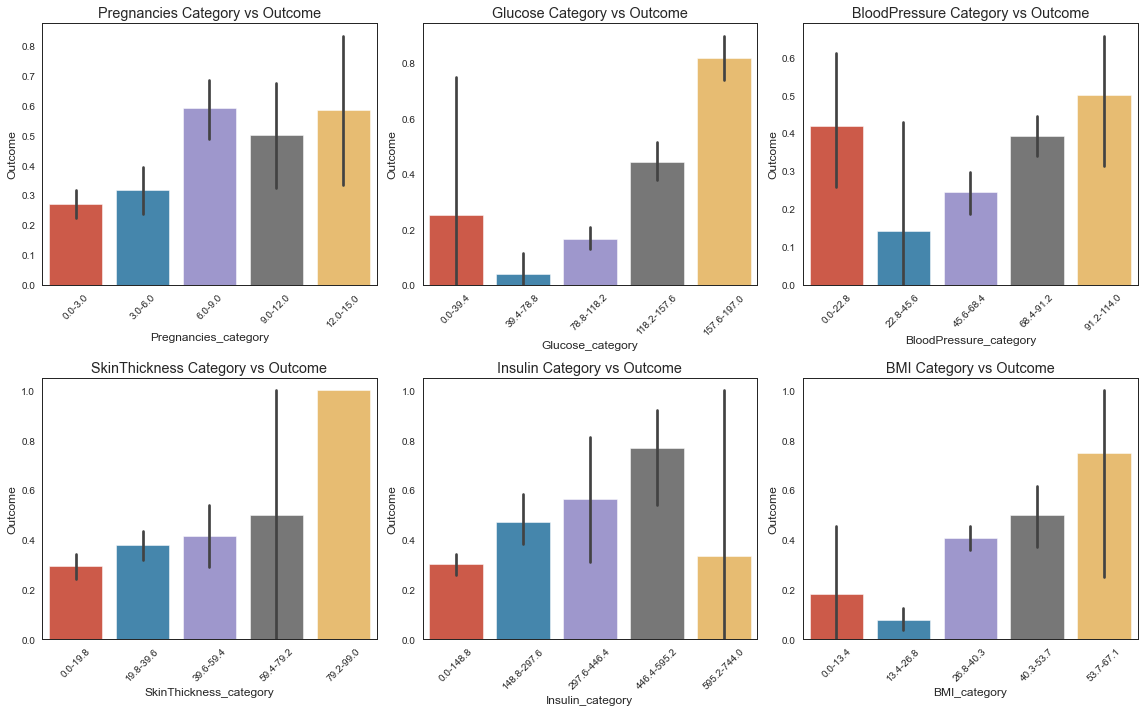

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Veriyi yükleyin (data_raw)
# ...

# Z-tabanlı örneklem boyutu hesaplama
confidence_level = 0.95
margin_error = 0.04
p = 0.5
Z = stats.norm.ppf((1 + confidence_level) / 2)
sample_size = math.ceil((Z**2 * p * (1 - p)) / (margin_error**2))

# Örneklem yapın
data_raw_sampled = data_raw.sample(n=sample_size, random_state=42)

# Sürekli değişkenler için kategorizasyon işlemi
continuous_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
num_categories = 5

def categorize_continuous_column(data, column, num_categories):
    min_value = data[column].min()
    max_value = data[column].max()
    step_size = (max_value - min_value) / num_categories
    bins = [min_value + i * step_size for i in range(num_categories + 1)]
    labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(num_categories)]
    data[column + '_category'] = pd.cut(data[column], bins=bins, labels=labels, include_lowest=True)

for column in continuous_columns:
    categorize_continuous_column(data_raw_sampled, column, num_categories)

# Grafikleri çizin
num_cols = 3
num_rows = (len(continuous_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 5 * num_rows))

for i, column in enumerate(continuous_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.barplot(x=column + '_category', y='Outcome', data=data_raw_sampled, ax=ax)
    ax.set_title(f'{column} Category vs Outcome')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


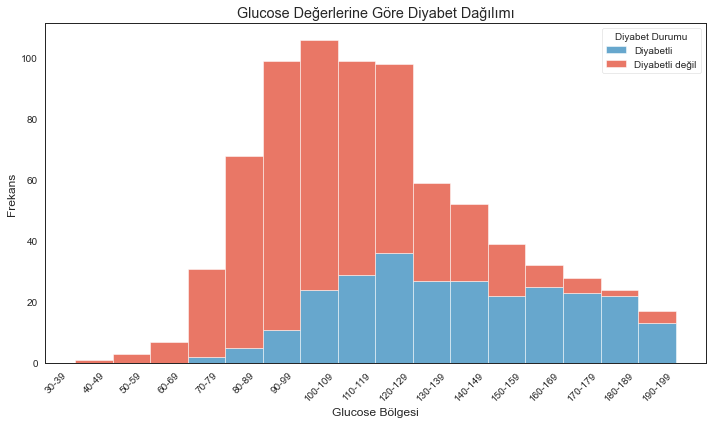

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleyin (data_raw)
# ...

# Veriyi kopyalayın
data_glucose_binned = data_raw.copy()

# Glucose değerlerini bölgelere ayırın
bins = list(range(0, 201, 10))  # 0'dan 200'e kadar 10'ar 10'ar bölgeler
labels = [f"{start}-{start+9}" for start in bins[:-1]]  # Bölge etiketleri
data_glucose_binned['Glucose_Binned'] = pd.cut(data_glucose_binned['Glucose'], bins=bins, labels=labels)

# Histogram çizimi
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(data=data_glucose_binned, x='Glucose_Binned', hue='Outcome', multiple='stack')
plt.xticks(rotation=45)
plt.xlabel('Glucose Bölgesi')
plt.ylabel('Frekans')
plt.title('Glucose Değerlerine Göre Diyabet Dağılımı')
plt.legend(title='Diyabet Durumu', labels=['Diyabetli', 'Diyabetli değil'])  # Renklerin anlamlarını belirtiyoruz
plt.tight_layout()
plt.show()



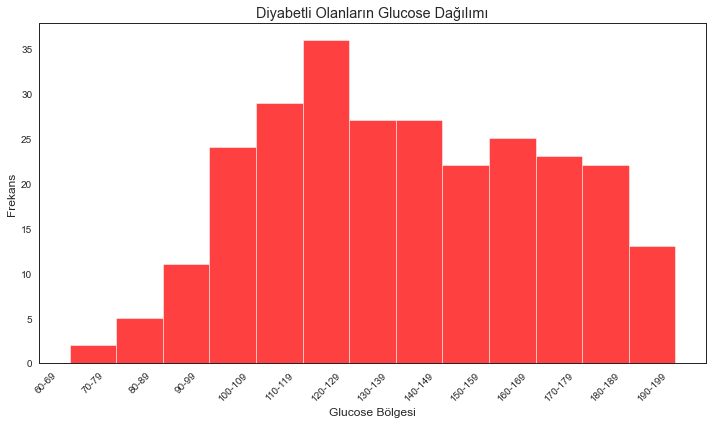

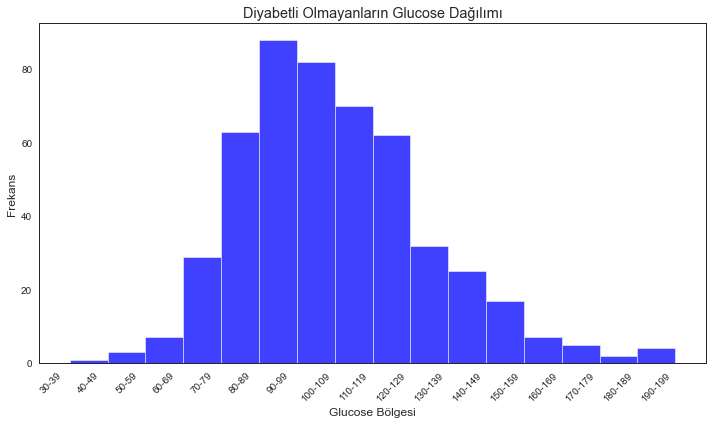

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleyin (data_raw)
# ...

# Veriyi kopyalayın
data_glucose_binned = data_raw.copy()

# Glucose değerlerini bölgelere ayırın
bins = list(range(0, 201, 10))
labels = [f"{start}-{start+9}" for start in bins[:-1]]
data_glucose_binned['Glucose_Binned'] = pd.cut(data_glucose_binned['Glucose'], bins=bins, labels=labels)

# Diyabetli ve diyabetli olmayan grupları ayırın
diabetic_group = data_glucose_binned[data_glucose_binned['Outcome'] == 1]
non_diabetic_group = data_glucose_binned[data_glucose_binned['Outcome'] == 0]

# Diyabetli olanların histogramı
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_group, x='Glucose_Binned', color='red')
plt.xticks(rotation=45)
plt.xlabel('Glucose Bölgesi')
plt.ylabel('Frekans')
plt.title('Diyabetli Olanların Glucose Dağılımı')
plt.tight_layout()
plt.show()

# Diyabetli olmayanların histogramı
plt.figure(figsize=(10, 6))
sns.histplot(data=non_diabetic_group, x='Glucose_Binned', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Glucose Bölgesi')
plt.ylabel('Frekans')
plt.title('Diyabetli Olmayanların Glucose Dağılımı')
plt.tight_layout()
plt.show()


çarpıklıktan bir yorum yapılabilir

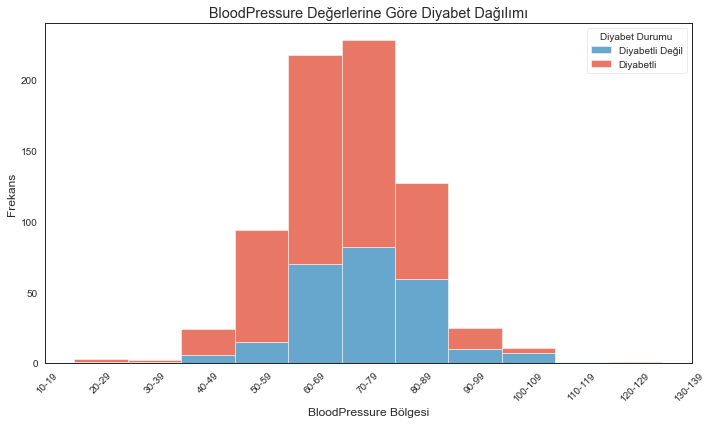

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükleyin (data_raw)
# ...

# Veriyi kopyalayın
data_bp_binned = data_raw.copy()

# Glucose değerlerini bölgelere ayırın
bins = list(range(0, 201, 10))  # 0'dan 200'e kadar 10'ar 10'ar bölgeler
labels = [f"{start}-{start+9}" for start in bins[:-1]]  # Bölge etiketleri
data_bp_binned['BP_Binned'] = pd.cut(data_bp_binned['BloodPressure'], bins=bins, labels=labels)

# Histogram çizimi

plt.figure(figsize=(10, 6))
sns.histplot(data=data_bp_binned, x='BP_Binned', hue='Outcome', multiple='stack')
plt.xticks(rotation=45)
plt.xlabel('BloodPressure Bölgesi')
plt.ylabel('Frekans')
plt.title('BloodPressure Değerlerine Göre Diyabet Dağılımı')
plt.legend(title='Diyabet Durumu', labels=['Diyabetli Değil', 'Diyabetli'])  # Renklerin anlamlarını belirtiyoruz
plt.tight_layout()
plt.show()



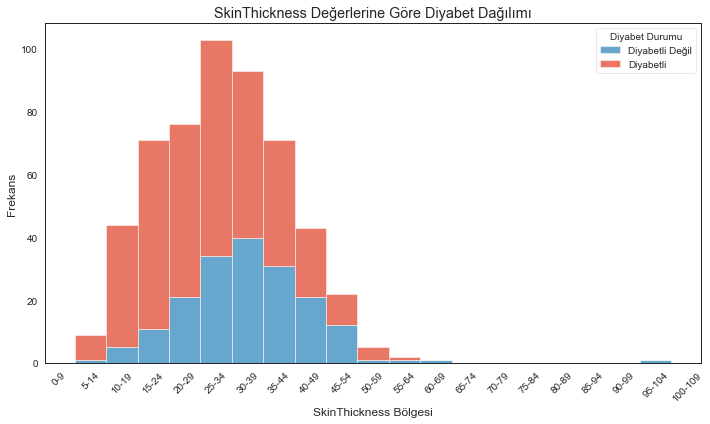

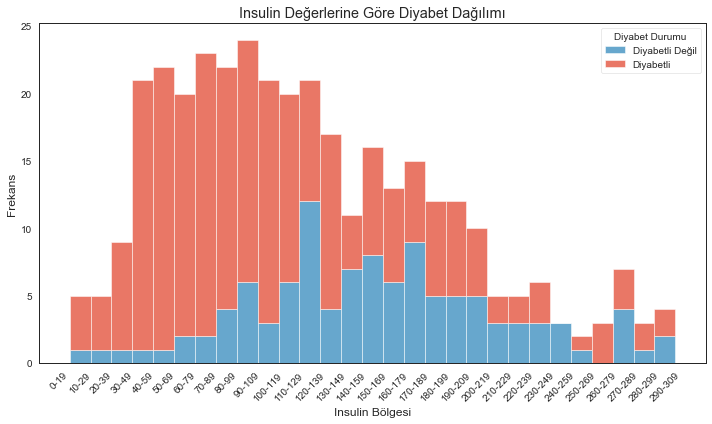

In [26]:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Veriyi yükleyin (data_raw)
    # ...

    # Veriyi kopyalayın
    data_st_binned = data_raw.copy()

    # Glucose değerlerini bölgelere ayırın
    bins = list(range(0, 201, 5))  # 0'dan 200'e kadar 10'ar 10'ar bölgeler
    labels = [f"{start}-{start+9}" for start in bins[:-1]]  # Bölge etiketleri
    data_st_binned['SkinThickness_Binned'] = pd.cut(data_st_binned['SkinThickness'], bins=bins, labels=labels)

    # Histogram çizimi
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_st_binned, x='SkinThickness_Binned', hue='Outcome', multiple='stack')
    plt.xticks(rotation=45)
    plt.xlabel('SkinThickness Bölgesi')
    plt.ylabel('Frekans')
    plt.title('SkinThickness Değerlerine Göre Diyabet Dağılımı')
    plt.legend(title='Diyabet Durumu', labels=['Diyabetli Değil', 'Diyabetli'])  # Renklerin anlamlarını belirtiyoruz
    plt.tight_layout()
    plt.show()

    # Veriyi yükleyin (data_raw)
    # ...

    # Veriyi kopyalayın
    data_ins_binned = data_raw.copy()

    # insulin değerlerini bölgelere ayırın
    bins = list(range(0, 301, 10))  # 0'dan 200'e kadar 10'ar 10'ar bölgeler
    labels = [f"{start}-{start+19}" for start in bins[:-1]]  # Bölge etiketleri
    data_ins_binned['Insulin_Binned'] = pd.cut(data_st_binned['Insulin'], bins=bins, labels=labels)

    # Histogram çizimi
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_ins_binned, x='Insulin_Binned', hue='Outcome', multiple='stack')
    plt.xticks(rotation=45)
    plt.xlabel('Insulin Bölgesi')
    plt.ylabel('Frekans')
    plt.title('Insulin Değerlerine Göre Diyabet Dağılımı')
    plt.legend(title='Diyabet Durumu', labels=['Diyabetli Değil', 'Diyabetli'])  # Renklerin anlamlarını belirtiyoruz
    plt.tight_layout()
    plt.show()



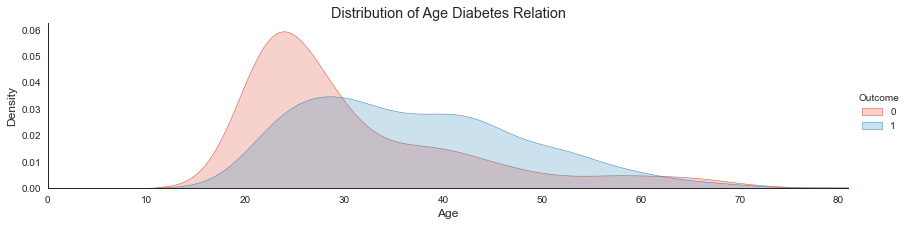

In [27]:
#plot distributions of age of patients
a = sns.FacetGrid( data1, hue = 'Outcome', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
plt.title('Distribution of Age Diabetes Relation')
plt.xlabel('Age')
plt.ylabel('Density')
a.add_legend()

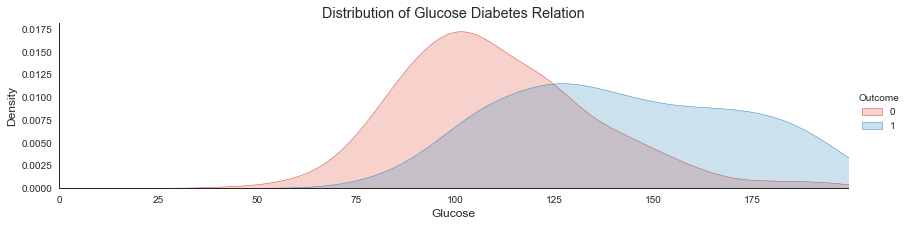

In [28]:
#plot distributions of glucose of patiets
a = sns.FacetGrid( data1, hue = 'Outcome', aspect=4 )
a.map(sns.kdeplot, 'Glucose', shade= True )
a.set(xlim=(0 , data1['Glucose'].max()))
plt.title('Distribution of Glucose Diabetes Relation')
plt.xlabel('Glucose')
plt.ylabel('Density')
a.add_legend()

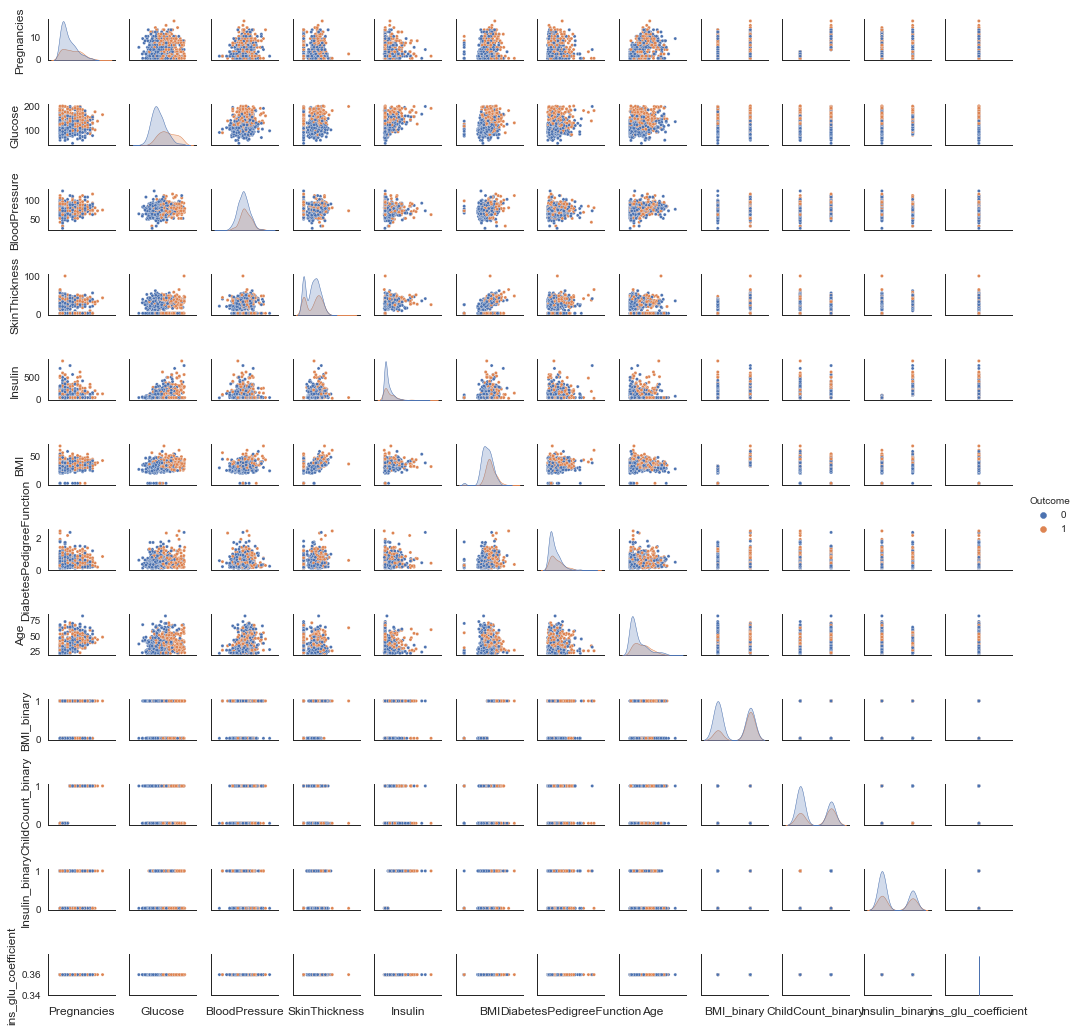

In [29]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Outcome', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

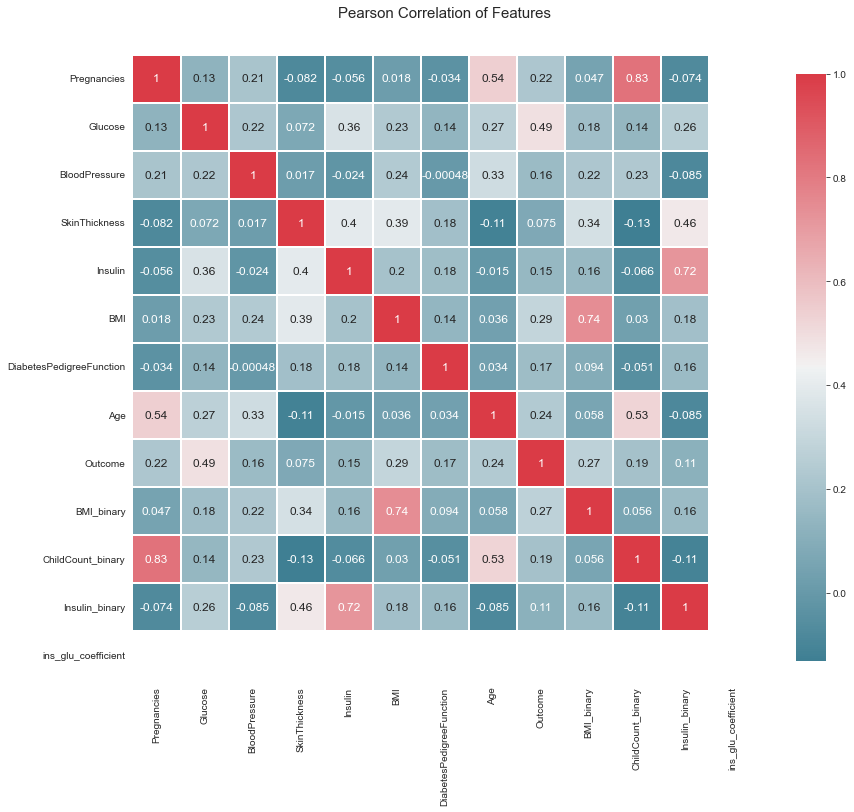

In [30]:
'''import matplotlib.pyplot as plt

# Veri noktaları
X = [1, 2, 3, 4, 5]
Y = [65, 75, 85, 95, 105]

# Eğimi ve kesişim noktasını hesapla
b1 = 0
b0 = 85

# Tahmin edilen notları hesapla
predicted_Y = [b0 + b1 * x for x in X]

# Doğruyu çiz
plt.scatter(X, Y, color='red', label='Veri Noktaları')
plt.plot(X, predicted_Y, color='blue', label='Doğru (ŷ = 85)')
plt.xlabel('Ders Çalışma Süresi (saat)')
plt.ylabel('Not')
plt.title('Ders Çalışma Süresi ve Not İlişkisi')
plt.legend()
plt.grid(True)
plt.show()
'''
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [31]:
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier
from sklearn import model_selection 
import numpy as np
import pandas as pd

#Machine Learning Algorithm (MLA) Selection and w
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]


data1_x_bin = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
Target = ['Outcome']
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
#eğitim için ayrılan x'ler, test için ayrılan x'ler, eğitim sonuçları, test sonuçları fonksiyon(data_x_özellikleri,target)

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)


    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
        

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.771087,0.775758,0.075459,0.002698
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.77087,0.774026,0.08127,0.00351
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.767609,0.770996,0.077586,0.283874
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.792826,0.767532,0.080697,0.038849
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.0,0.765801,0.058499,0.096397
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.762771,0.053484,0.1278
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.768043,0.761039,0.084924,0.002778
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.94913,0.757576,0.053231,0.107297
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.758913,0.754978,0.067031,0.000408
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1.0,0.754978,0.065246,0.0532


Text(0, 0.5, 'Algorithm')

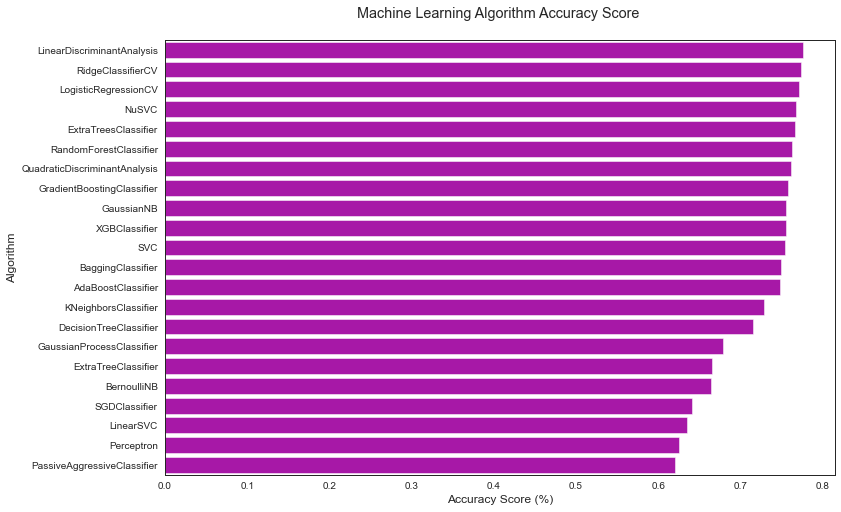

In [32]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [33]:
#IMPORTANT: This is a handmade model for learning purposes only.
#However, it is possible to create your own predictive model without a fancy algorithm :)

#coin flip model with random 1/diabetes 0/not diabetes

import random
import pandas as pd
from sklearn import metrics

# Assuming you have your DataFrame named data1
# You need to replace this with your actual DataFrame

# Iterate over DataFrame rows as (index, Series) pairs
for index, row in data1.iterrows(): 
    if random.random() > 0.5:     
        data1.at[index, 'Random_Predict'] = 1  # Predict diabetes/1
    else: 
        data1.at[index, 'Random_Predict'] = 0  # Predict not diabetes/0

# Score random guess of diabetes
data1['Random_Score'] = 0
data1.loc[(data1['Outcome'] == data1['Random_Predict']), 'Random_Score'] = 1

# Calculate and print accuracy
accuracy = data1['Random_Score'].mean() * 100
print('Coin Flip Model Accuracy: {:.2f}%'.format(accuracy))

# Using scikit's accuracy_score function
accuracy_sci = metrics.accuracy_score(data1['Outcome'], data1['Random_Predict']) * 100
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(accuracy_sci))


Coin Flip Model Accuracy: 47.79%
Coin Flip Model Accuracy w/SciKit: 47.79%


In [34]:
#group by or pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
pivot_glucose = data1[data1.Glucose>=100].groupby(['Pregnancies','BloodPressure', 'SkinThickness','Insulin'])['Outcome'].mean()
print('Outcome Decision Tree w/Glucose Node: \n',pivot_glucose)
print("Glucose Indexed Outcome",pivot_glucose.mean())
pivot_insulin = data1[data1.Insulin>= 230].groupby(['Pregnancies','BloodPressure', 'SkinThickness',])['Outcome'].mean()
print('\n\nOutcome Decision Tree w/Insulin Node: \n',pivot_insulin)
print("Insulin Indexed Outcome",pivot_insulin.mean())


Outcome Decision Tree w/Glucose Node: 
 Pregnancies  BloodPressure  SkinThickness  Insulin
0            40             35             168.0      1.0
             50             0              30.5       0.0
                            36             159.0      1.0
             52             0              30.5       0.0
             56             13             105.0      0.0
                                                     ... 
13           114            0              30.5       1.0
14           62             30             30.5       1.0
             78             25             184.0      1.0
15           70             32             110.0      1.0
17           72             41             114.0      1.0
Name: Outcome, Length: 518, dtype: float64
Glucose Indexed Outcome 0.4346364221364222


Outcome Decision Tree w/Insulin Node: 
 Pregnancies  BloodPressure  SkinThickness
0            58             20               0.0
             60             29               1.0
   

In [35]:
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
def mytree(df):
    
    #initialize table to store predictions
#yeni bir DataFrame oluşturuyor. data parametresi kullanılarak DataFrame'in sütunları ve içeriği belirlenir. 
#Burada 'Predict' adında bir sütun ekleniyor ve bu sütunun başlangıçta boş bir liste ile oluşturulduğunu görüyorsunuz.
    Model = pd.DataFrame(data = {'Predict':[]})

#Genel olarak bakıldığında, bu kodun amacı muhtemelen verilen sütunların içeriğine bağlı olarak belirlenen grubun diyabet olup olmama olasığını bulmak

#tahminlerini belirlemek için kullanılmasıdır. Eğer "model "Predict" sütununda diayabet oldu/olmadı olarak tahminde bulunuyor gibi görünüyor.



#Başta tahmin'e 0 değerini veriyoruz eğer cevap öyleyse 1 değerini alıyor.
    for index, row in df.iterrows():
        
        Model.loc[index, 'Predict'] = 0

        #ilk koşulumuz 45 yaşında veya büyük bireylerle filtrelenir
        if (df.loc[index, 'Age'] >= 45):
                  Model.loc[index, 'Predict'] = 1

        #Burda ise insulin, BMI, Glucose, SkinThickness değerleri ortalama değerlerden yüksekse eğer 1 denir
        if ((df.loc[index, 'Insulin'] <= 150) & 
            (df.loc[index, 'BMI'] >= 40 ) & 
            (df.loc[index, 'Glucose'] >= 100)  &
            (df.loc[index, 'SkinThickness'] > 35)

           ):
                  Model.loc[index, 'Predict'] = 1
        
        #Burda ise sadece insulin ve glukoz üzerinden çıkarım yapılmaya çalışılıyor. Ekstra olarak insulin ve glukozlu 
        #Bu örneği ekledim çünkü korelasyonun fazla olduğunu biliyoruz genel olarak. Modele iyi bir öğretim olabilir
        if ((df.loc[index, 'Insulin'] <= 150) &
            (df.loc[index, 'Glucose'] >= 150)
            ):
            Model.loc[index, 'Predict'] = 1
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Outcome'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Outcome'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 68.49%

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       500
           1       0.56      0.43      0.49       268

    accuracy                           0.68       768
   macro avg       0.65      0.63      0.63       768
weighted avg       0.67      0.68      0.67       768



Confusion matrix, without normalization
[[410  90]
 [152 116]]
Normalized confusion matrix
[[0.82 0.18]
 [0.57 0.43]]


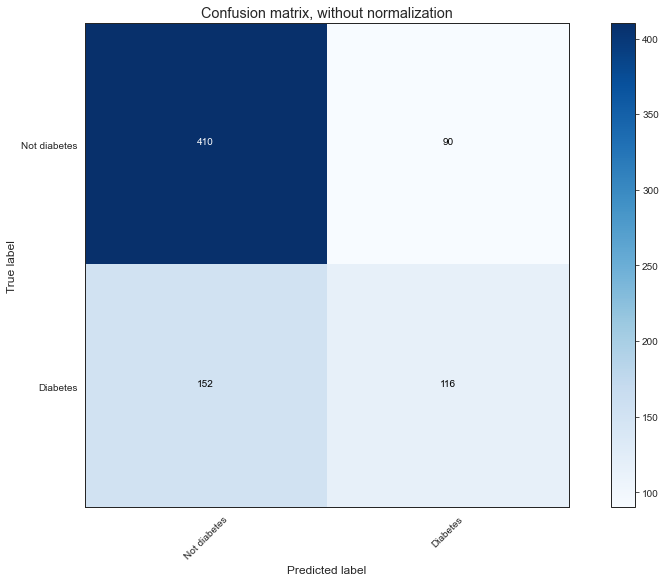

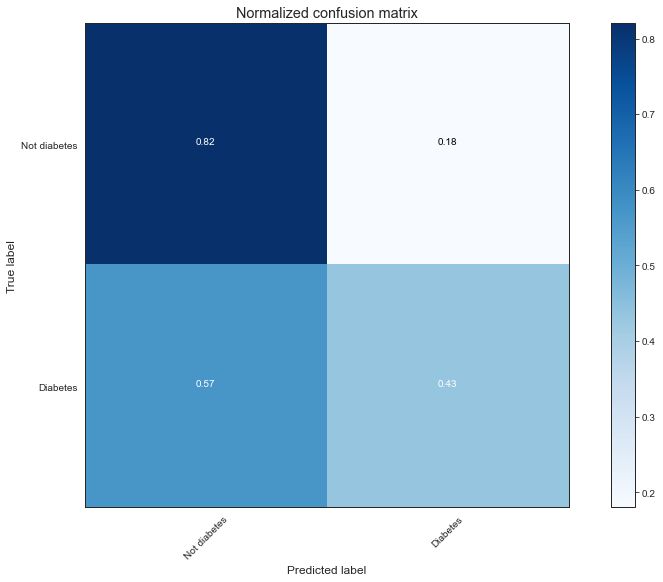

In [36]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Outcome'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Not diabetes', 'Diabetes']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')


In [37]:
# İnsulin değeri 1 olanlar
query_1 = data1[data1['Insulin_binary'] == 1]

# İnsulin değeri ve çocuk sayısı her ikisi de 1 olanlar
query_2 = data1[(data1['Insulin_binary'] == 1) & (data1['ChildCount_binary'] == 1)]

# İnsulin, çocuk sayısı ve BMI değeri hepsi 1 olanlar
query_3 = data1[(data1['Insulin_binary'] == 1) & (data1['ChildCount_binary'] == 1) & (data1['BMI_binary'] == 1)]
print(query_1,query_2,query_3)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
6              3       78             50             32     88.0  31.0   
8              2      197             70             45    543.0  30.5   
13             1      189             60             23    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
748            3      187             70             22    200.0  36.4   
753            0      181             88             44    510.0  43.3   
755            1      128             88             39    110.0  36.5   
763           10      101             76             48    180.0  32.9   
765            5      121             72             23    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  BMI_binary  ChildCount_binary  \
3                       0.167   2

In [38]:
bmi_class_1_count = (data1['BMI_binary'] == 1).sum()
print("BMI Binary Class 1 Count:", bmi_class_1_count)


BMI Binary Class 1 Count: 425


In [39]:
#data1['BMI_binary'] = data1['BMI'].apply(lambda x: 1 if x >= 31 else 0)
#data1['ChildCount_binary'] = data1['Pregnancies'].apply(lambda x: 1 if x > 3.84 else 0)
#data1['Insulin_binary'] = data1['Insulin'].apply(lambda x: 1 if x >= 80 else 0)
# Diğer değişkenler için benzer şekilde dönüşüm işlemleri yapılabilir
ins_class_1_count = (data1['Insulin_binary'] == 1).sum()
print("Insulin Binary Class 1 Count:", ins_class_1_count)
total_diabetes = (data1['Outcome'] == 1).sum()
total_count = data1['Outcome'].count()  # Parantez kapatma eksiği düzeltildi
print("total_count", total_count)
print("total diabetes", total_diabetes)
perc = (total_diabetes / total_count) * 100  # "total diabetes" düzeltilerek
print(perc)
ins_class_1_count/total_diabetes # Bu satır ile ortalama insulin değerinden düşük olan bireylerin de diyabet hastası 
#olabildiğini anlarız. 
#Elimizdeki popülasyonun %34.89'unun diyabet olduğunu elde ederiz.
import researchpy as rp
print(rp.summary_cont(data1[["Outcome","Insulin"]])) # yazdığımız kodla ise belirli bir güven aralığında ortalama insulin değerinin
#%95'inin 102 ve 87 arasında olduğunu elde ederiz.
query1 = data1[(data1["Outcome"] == 1) & (data1["Insulin_binary"] == 1)].count()
print("Higher Insulin than average with diabetes \n",rp.summary_cont(query1[["Outcome", "Insulin"]]))

query2 = data1[(data1["Outcome"] == 1) & (data1["Insulin_binary"] == 0)].count()
print("Lower Insulin than average with diabetes \n",rp.summary_cont(query2[["Outcome", "Insulin"]]))
 # yazdığımız kodla ise belirli bir güven aralığında ortalama insulin değerinin
higher_ins_diabetes= query1/total_diabetes*100
lower_ins_diabetes= query2/total_diabetes*100


Insulin Binary Class 1 Count: 289
total_count 768
total diabetes 268
34.89583333333333


  Variable      N     Mean        SD      SE  95% Conf.  Interval
0  Outcome  768.0   0.3490    0.4770  0.0172     0.3152    0.3827
1  Insulin  768.0  94.6523  105.5476  3.8086    87.1758  102.1289


Higher Insulin than average with diabetes 
    Variable    N   Mean   SD   SE  95% Conf.  Interval
0       NaN  2.0  121.0  0.0  0.0        NaN       NaN


Lower Insulin than average with diabetes 
    Variable    N   Mean   SD   SE  95% Conf.  Interval
0       NaN  2.0  147.0  0.0  0.0        NaN       NaN


In [40]:
higher_ins_diabetes=(query1/total_diabetes).mean()*100
lower_ins_diabetes= (query2/total_diabetes).mean()*100
print("people who have higher insulin score than average diabetes percentage\n",round(higher_ins_diabetes,2))
print("people who have lower insulin score than average  diabetes percentage\n",round(lower_ins_diabetes,2))
class1_perc = round(higher_ins_diabetes,2)/total_diabetes
class0_perc = round(lower_ins_diabetes,2)/total_diabetes
print("people who have higher insulin score than average/ total case percentage\n",(class1_perc))
print("people who have lower insulin score than average/ total case percentage\n",(class0_perc))

people who have higher insulin score than average diabetes percentage
 45.15
people who have lower insulin score than average  diabetes percentage
 54.85
people who have higher insulin score than average/ total case percentage
 0.16847014925373133
people who have lower insulin score than average/ total case percentage
 0.20466417910447762


In [41]:
child_class_1_count = (data1['ChildCount_binary'] == 1).sum()
print("Pregnancies Binary Class 1 Count:", child_class_1_count)


Pregnancies Binary Class 1 Count: 344


In [42]:
sorgu1 = data1[(data1["Insulin_binary"] == 1) & (data1["Outcome"] == 1)].shape[0]
print("Insulin,Pregnancies'de class1 olanların ve Diyabet olaların Toplamı:", sorgu1)

Insulin,Pregnancies'de class1 olanların ve Diyabet olaların Toplamı: 121


In [43]:
sorgu2 = data1[(data1["Insulin_binary"] == 1) & (data1['ChildCount_binary'] == 1)  & (data1["Outcome"] == 1)].shape[0]
print("Insulin,Pregnancies'de class1 olanların ve Diyabet olaların Toplamı:", sorgu2)


Insulin,Pregnancies'de class1 olanların ve Diyabet olaların Toplamı: 59


In [44]:
sorgu3 = data1[(data1["Insulin_binary"] == 1) & (data1['ChildCount_binary'] == 1) & (data1['BMI_binary'] == 1) & (data1["Outcome"] == 1)].shape[0]
print("Insulin,Pregnancies ve BMI'da class1 olanların ve Diyabet olaların Toplamı:", sorgu3)


Insulin,Pregnancies ve BMI'da class1 olanların ve Diyabet olaların Toplamı: 43


In [45]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))
#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score=True)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 100.00
BEFORE DT Test w/bin score mean: 71.00
BEFORE DT Test w/bin score 3*std: +/- 10.83
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 88.66
AFTER DT Test w/bin score mean: 78.25
AFTER DT Test w/bin score 3*std: +/- 4.00
----------


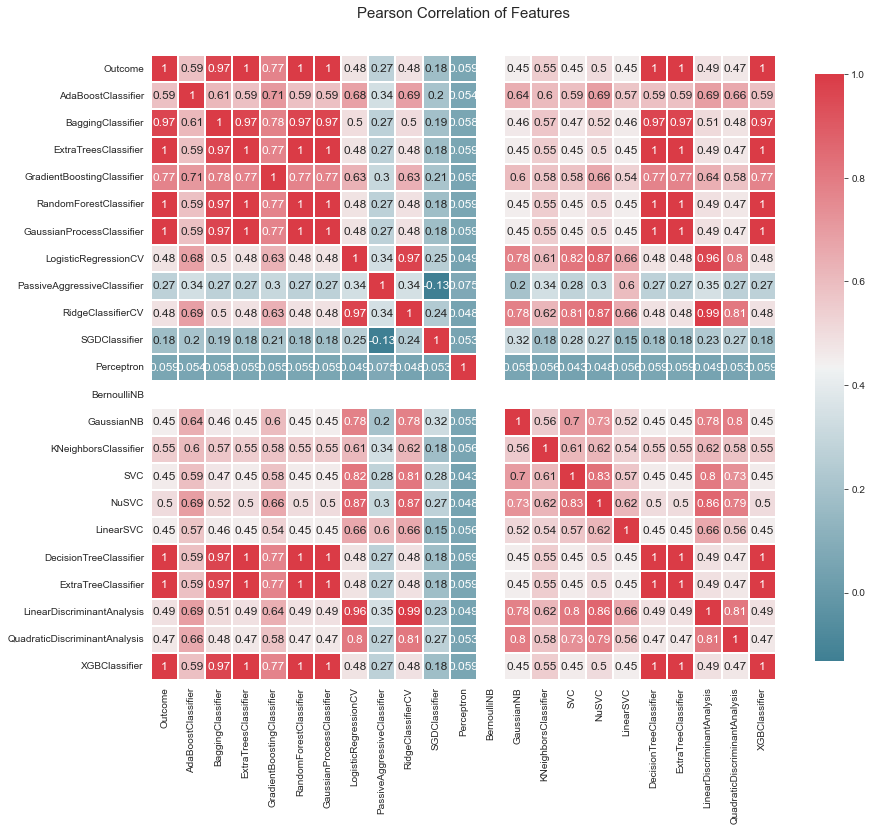

In [46]:
#compare algorithm predictions with each other, where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

In [47]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

# ... (diğer kodlar)

#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators=vote_est, voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}".format(vote_hard_cv['train_score'].mean() * 100)) 
print("Hard Voting Test w/bin score mean: {:.2f}".format(vote_hard_cv['test_score'].mean() * 100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}".format(vote_hard_cv['test_score'].std() * 100 * 3))
print('-' * 10)

#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators=vote_est, voting='soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv=cv_split, return_train_score=True)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}".format(vote_soft_cv['train_score'].mean() * 100)) 
print("Soft Voting Test w/bin score mean: {:.2f}".format(vote_soft_cv['test_score'].mean() * 100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}".format(vote_soft_cv['test_score'].std() * 100 * 3))
print('-' * 10)


Hard Voting Training w/bin score mean: 93.57
Hard Voting Test w/bin score mean: 76.45
Hard Voting Test w/bin score 3*std: +/- 4.20
----------
Soft Voting Training w/bin score mean: 97.74
Soft Voting Test w/bin score mean: 77.10
Soft Voting Test w/bin score 3*std: +/- 5.76
----------


In [48]:
#IMPORTANT: THIS SECTION IS UNDER CONSTRUCTION!!!! 12.24.17
#UPDATE: This section was scrapped for the next section; as it's more computational friendly.

#WARNING: Running is very computational intensive and time expensive
#code is written for experimental/developmental purposes and not production ready


#tune each estimator before creating a super model

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



grid_n_estimator = [500, 1000, 100, 2000, 2500, 3000]
grid_ratio = [.1,.25,.5,.75,1.0,1.5,2.0,2.5,3.0]
grid_learn = [.01,.03,.05,.1,.25,0.50,0.75,1]
grid_max_depth = [2,4,6,None]
grid_min_samples = [.03,.05,.10,0.20,0.40]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]



vote_param = [{
##http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'ada__n_estimators': grid_n_estimator,
            'ada__learning_rate': grid_ratio,
            'ada__algorithm': ['SAMME', 'SAMME.R'],
            'ada__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'bc__n_estimators': grid_n_estimator,
            'bc__max_samples': grid_ratio,
            'bc__oob_score': grid_bool, 
            'bc__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
               'etc__n_estimators': grid_n_estimator,
            'etc__criterion': grid_criterion,
            'etc__max_depth': grid_max_depth,
            'etc__random_state': grid_seed,


            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'gbc__loss': ['deviance', 'exponential'],
            'gbc__learning_rate': grid_ratio,
            'gbc__n_estimators': grid_n_estimator,
            'gbc__criterion': ['friedman_mse', 'mse', 'mae'],
            'gbc__max_depth': grid_max_depth,
            'gbc__min_samples_split': grid_min_samples,
            'gbc__min_samples_leaf': grid_min_samples,      
            'gbc__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'rfc__n_estimators': grid_n_estimator,
            'rfc__criterion': grid_criterion,
            'rfc__max_depth': grid_max_depth,
            'rfc__min_samples_split': grid_min_samples,
            'rfc__min_samples_leaf': grid_min_samples,   
            'rfc__bootstrap': grid_bool,
            'rfc__oob_score': grid_bool, 
            'rfc__random_state': grid_seed,
        
            #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'lr__fit_intercept': grid_bool,
            'lr__penalty': ['l1','l2'],
            'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'lr__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'bnb__alpha': grid_ratio,
            'bnb__prior': grid_bool,
            'bnb__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'knn__n_neighbors': [1,2,3,4,5,6,7],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C': grid_max_depth,
            'svc__gamma': grid_ratio,
            'svc__decision_function_shape': ['ovo', 'ovr'],
            'svc__probability': [True],
            'svc__random_state': grid_seed,
    
    
            #http://xgboost.readthedocs.io/en/latest/parameter.html
             'xgb__learning_rate': grid_ratio,
            'xgb__max_depth': [2,4,6,8,10],
            'xgb__tree_method': ['exact', 'approx', 'hist'],
            'xgb__objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],
            'xgb__seed': grid_seed    

        }]




#Soft Vote with tuned models
grid_soft = model_selection.GridSearchCV(estimator = vote_soft, param_grid = vote_param,scoring = 'roc_auc', cv =2, return_train_score=True)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print(grid_soft.cv_results_.keys())
print(grid_soft.cv_results_['params'])
print('Soft Vote Tuned Parameters: ', grid_soft.best_params_)
print(grid_soft.cv_results_['mean_train_score'])
print("Soft Vote Tuned Training w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print(grid_soft.cv_results_['mean_test_score'])
print("Soft Vote Tuned Test w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("Soft Vote Tuned Test w/bin score 3*std: +/- {:.2f}". format(grid_soft.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#credit: https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
cv_keys = ('mean_test_score', 'std_test_score', 'params')
for r, _ in enumerate(grid_soft.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid_soft.cv_results_[cv_keys[0]][r],
             grid_soft.cv_results_[cv_keys[1]][r] / 2.0,
             grid_soft.cv_results_[cv_keys[2]][r]))


print('-'*10)

OverflowError: cannot fit 'int' into an index-sized integer

In [ ]:
#data1[data1_x_bin], data1[Target]
data1[data1_x_bin].info()
data1[Target].info()

In [ ]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],
    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
               [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

   
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

In [ ]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split,return_train_score=True)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split,return_train_score=True)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


In [ ]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Outcome'] = mytree(data_val).astype(int)


#decision tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
submit_dt = tree.DecisionTreeClassifier()
submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
submit_dt.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_dt.best_params_) #Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
data_val['Outcome'] = submit_dt.predict(data_val[data1_x_bin])


#bagging w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77990
submit_bc = ensemble.BaggingClassifier()
submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), param_grid= {'n_estimators':grid_n_estimator, 'max_samples': grid_ratio, 'oob_score': grid_bool, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_bc.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_bc.best_params_) #Best Parameters:  {'max_samples': 0.25, 'n_estimators': 500, 'oob_score': True, 'random_state': 0}
data_val['Outcome'] = submit_bc.predict(data_val[data1_x_bin])


#extra tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
submit_etc = ensemble.ExtraTreesClassifier()
submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_etc.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_etc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
data_val['Outcome'] = submit_etc.predict(data_val[data1_x_bin])


#random foreset w/full dataset modeling submission score: defaults= 0.71291, tuned= 0.73205
submit_rfc = ensemble.RandomForestClassifier()
submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_rfc.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_rfc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
data_val['Outcome'] = submit_rfc.predict(data_val[data1_x_bin])



#ada boosting w/full dataset modeling submission score: defaults= 0.74162, tuned= 0.75119
submit_abc = ensemble.AdaBoostClassifier()
submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid={'n_estimators': grid_n_estimator, 'learning_rate': grid_ratio, 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_abc.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_abc.best_params_) #Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}
data_val['Outcome'] = submit_abc.predict(data_val[data1_x_bin])


#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
submit_gbc = ensemble.GradientBoostingClassifier()
submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid={'learning_rate': grid_ratio, 'n_estimators': grid_n_estimator, 'max_depth': grid_max_depth, 'random_state':grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_gbc.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_gbc.best_params_) #Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
data_val['Outcome'] = submit_gbc.predict(data_val[data1_x_bin])

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
submit_xgb = XGBClassifier()
submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
submit_xgb.fit(data1[data1_x_bin], data1[Target])
print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
data_val['Outcome'] = submit_xgb.predict(data_val[data1_x_bin])


#hard voting classifier w/full dataset modeling submission score: defaults= 0.75598, tuned = 0.77990
data_val['Outcome'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Outcome'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
data_val['Outcome'] = vote_soft.predict(data_val[data1_x_bin])
data_val['Outcome'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['Outcome']]
submit.to_csv("C:/Users/Eren/OneDrive/Masaüstü/dataset_for_research/submit2.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)